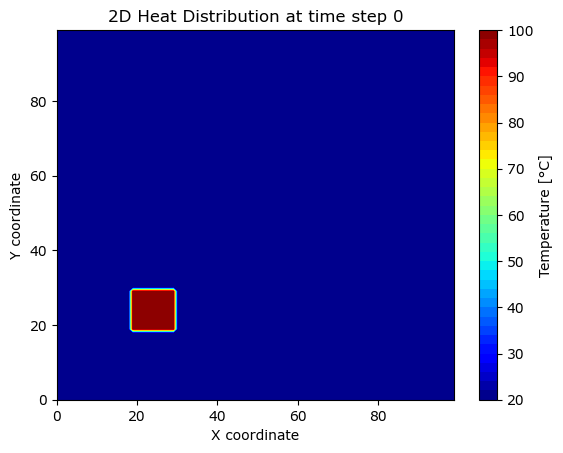

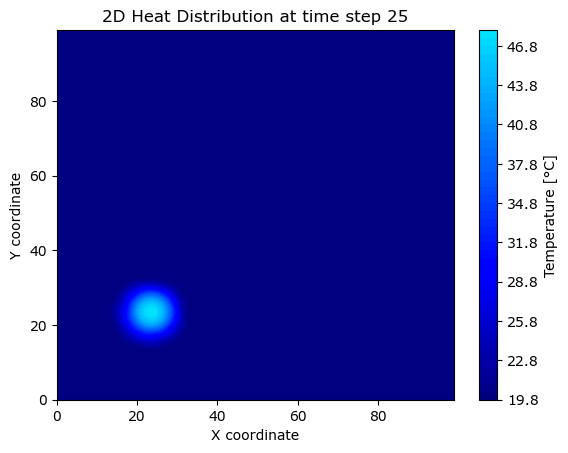

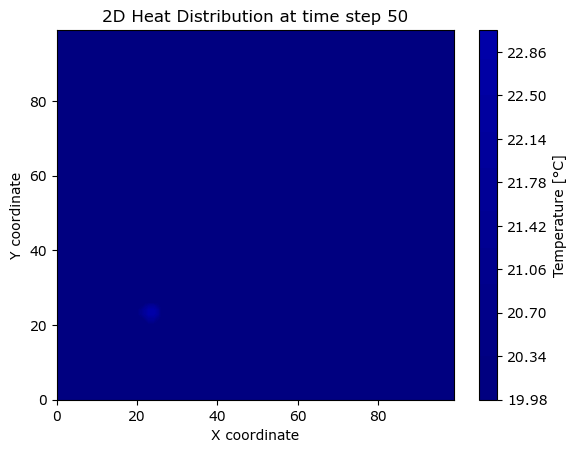

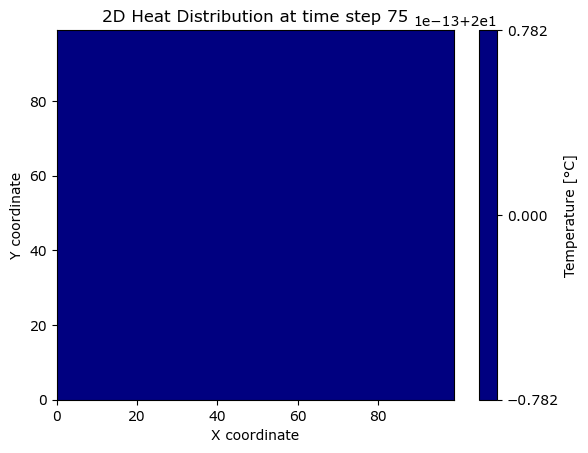

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Plate size
nx, ny = 100, 100
# Duration of simulation
nt = 100  
# Increment size
dx = 2 / (nx - 1)
dy = 2 / (ny - 1)
# Thermal diffusivity of the plate
alpha = 0.25
# Time step (adjusted for stability using the CFL condition)
dt = dx * dy / (4 * alpha)

# Initialize the temperature distribution
u = np.full((nx, ny), 20)

# Create a hot spot (adjust size if needed)
u[int(0.4 / dx):int(0.6 / dx + 1), int(0.4 / dy):int(0.6 / dy + 1)] = 100

def thermal_equation(u):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] = (u[i, j] +
                       alpha * 
                       (dt / dx ** 2 * 
                        (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                        dt / dy ** 2 * 
                        (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1])))
    return u

def run_simulation(u):
    u_hist = [u.copy()]
    for t in range(nt):
        u = thermal_equation(u)
        u_hist.append(u.copy())
    return u_hist

# Run the simulation to generate u_hist
u_hist = run_simulation(u)

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, nx), np.arange(0, ny))

# Set color interpolation and color map
colorinterpolation = 50
colourMap = plt.cm.jet

global_min_temp = np.min(u_hist[0])
global_max_temp = np.max(u_hist[0])

# Visualize the process at different time steps
for idx in [0, nt // 4, nt // 2, 3 * nt // 4, ]:
    plt.figure()
    plt.contourf(X, Y, u_hist[idx], colorinterpolation, cmap=colourMap, vmin=global_min_temp, vmax=global_max_temp)
    plt.title(f'2D Heat Distribution at time step {idx}')
    plt.colorbar(label='Temperature [°C]')
    plt.xlabel('X coordinate')
    plt.ylabel('Y coordinate')
    plt.show()

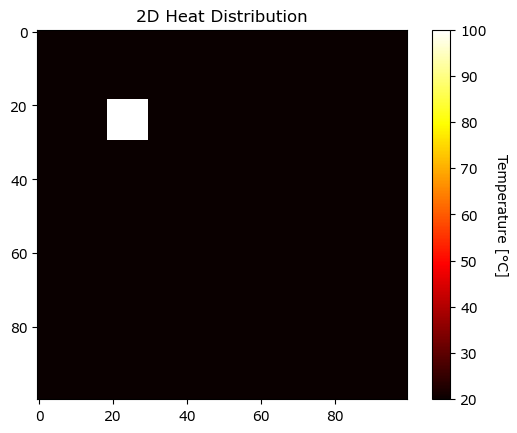

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

# Plate size, blocks (increased for higher resolution)
nx, ny = 100, 100
# Duration of simulation
nt = 100  
# Increment size
dx = 2. / (nx - 1)
dy = 2. / (ny - 1)
# Thermal diffusivity of the plate
alpha = 0.25
# Time step (adjusted for stability using the Courant-Friedrichs-Lewy condition)
dt = dx * dy / (4 * alpha)

u = np.full((nx, ny), 20)
# Create a hot spot (adjust size if needed)
u[int(0.4 / dx):int(0.6 / dx + 1), int(0.4 / dy):int(0.6 / dy + 1)] = 100 #u[y,x]

def thermal_equation(u):
    for i in range(1, nx - 1):
        for j in range(1, ny - 1):
            u[i, j] = (u[i, j] +
                       alpha * 
                       (dt / dx ** 2 * 
                        (u[i + 1, j] - 2 * u[i, j] + u[i - 1, j]) +
                        dt / dy ** 2 * 
                        (u[i, j + 1] - 2 * u[i, j] + u[i, j - 1])))
    return u

def run_simulation(u):
    u_hist = [u.copy()]
    for t in range(nt):
        u = thermal_equation(u)
        u_hist.append(u.copy())
    return u_hist

# Run the simulation to generate u_hist
u_hist = run_simulation(u)

# Create a figure
fig, ax = plt.subplots()
frame = ax.imshow(u_hist[0], cmap='hot', vmin=20, vmax=100)
cbar = fig.colorbar(frame)
cbar.set_label('Temperature [°C]', rotation=270, labelpad=15)
ax.set_title('2D Heat Distribution')

def update(frame_num, u_hist, frame):
    frame.set_data(u_hist[frame_num])
    return frame,

# Create and run the animation
anim = animation.FuncAnimation(fig, update, frames=nt, fargs=(u_hist, frame), blit=True)
plt.show()